In [1]:
# Import the dependencies

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size= 1500)

lngs = np.random.uniform(low = -180.000, high=180.000, size =1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [3]:
# Add the latitudes and longitudes to a list

coordinates = list(lat_lngs)



In [4]:
# Use the citipy module to determine city based on latitude and longitude.
import pip
pip.main(['install','citipy'])
from citipy import citipy


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)
#print(cities)

609

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in the list.
# for i, city in enumerate(cities): is orginal code but I stop at 50 so I can go on.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 1 | mar del plata
Processing Record 2 of Set 1 | bushenyi
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | pandan
Processing Record 5 of Set 1 | qaanaaq
Processing Record 6 of Set 1 | aurillac
Processing Record 7 of Set 1 | kavaratti
Processing Record 8 of Set 1 | almansa
Processing Record 9 of Set 1 | ancud
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | khonuu
City not found. Skipping...
Processing Record 12 of Set 1 | nanortalik
Processing Record 13 of Set 1 | joao camara
Processing Record 14 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 15 of Set 1 | laguna
Processing Record 16 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | mehamn
Processing Record 19 of Set 1 | bambous virieux
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | naze
Processing Record 22 of Set 

Processing Record 38 of Set 4 | lompoc
Processing Record 39 of Set 4 | bell ville
Processing Record 40 of Set 4 | georgetown
Processing Record 41 of Set 4 | nauchnyy gorodok
Processing Record 42 of Set 4 | kodiak
Processing Record 43 of Set 4 | umm lajj
Processing Record 44 of Set 4 | filadelfia
Processing Record 45 of Set 4 | palmas
Processing Record 46 of Set 4 | beringovskiy
Processing Record 47 of Set 4 | belyy yar
Processing Record 48 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 49 of Set 4 | pringsewu
Processing Record 50 of Set 4 | ostrovnoy
Processing Record 1 of Set 5 | new norfolk
Processing Record 2 of Set 5 | lebu
Processing Record 3 of Set 5 | avarua
Processing Record 4 of Set 5 | rapid valley
Processing Record 5 of Set 5 | lavrentiya
Processing Record 6 of Set 5 | kayerkan
Processing Record 7 of Set 5 | zuwarah
Processing Record 8 of Set 5 | tura
Processing Record 9 of Set 5 | oktyabrskiy
Processing Record 10 of Set 5 | sassandra
Processing Record 11 

Processing Record 32 of Set 8 | tuatapere
Processing Record 33 of Set 8 | kiunga
Processing Record 34 of Set 8 | rocha
Processing Record 35 of Set 8 | dubbo
Processing Record 36 of Set 8 | vila franca do campo
Processing Record 37 of Set 8 | uyuni
Processing Record 38 of Set 8 | tautira
Processing Record 39 of Set 8 | vila velha
Processing Record 40 of Set 8 | rio cuarto
Processing Record 41 of Set 8 | codrington
Processing Record 42 of Set 8 | itinga
Processing Record 43 of Set 8 | nagar
Processing Record 44 of Set 8 | tuxpan
Processing Record 45 of Set 8 | ayan
Processing Record 46 of Set 8 | bulgan
Processing Record 47 of Set 8 | korla
Processing Record 48 of Set 8 | axim
Processing Record 49 of Set 8 | elko
Processing Record 50 of Set 8 | kresttsy
Processing Record 1 of Set 9 | araouane
Processing Record 2 of Set 9 | tahe
Processing Record 3 of Set 9 | lalpur
Processing Record 4 of Set 9 | fare
Processing Record 5 of Set 9 | severo-kurilsk
Processing Record 6 of Set 9 | borisovka
P

Processing Record 22 of Set 12 | kiruna
Processing Record 23 of Set 12 | ilulissat
Processing Record 24 of Set 12 | labuhan
Processing Record 25 of Set 12 | coihaique
Processing Record 26 of Set 12 | tazovskiy
Processing Record 27 of Set 12 | rio gallegos
Processing Record 28 of Set 12 | roma
Processing Record 29 of Set 12 | bonavista
Processing Record 30 of Set 12 | hukuntsi
Processing Record 31 of Set 12 | viedma
Processing Record 32 of Set 12 | port lincoln
Processing Record 33 of Set 12 | saryshagan
City not found. Skipping...
Processing Record 34 of Set 12 | narsaq
Processing Record 35 of Set 12 | coruripe
Processing Record 36 of Set 12 | beidao
Processing Record 37 of Set 12 | dandong
Processing Record 38 of Set 12 | zeya
Processing Record 39 of Set 12 | anju
Processing Record 40 of Set 12 | skagastrond
City not found. Skipping...
Processing Record 41 of Set 12 | ayorou
Processing Record 42 of Set 12 | artyk
City not found. Skipping...
Processing Record 43 of Set 12 | kismayo
Pro

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mar Del Plata,-38.0023,-57.5575,71.62,88,75,15.01,AR,2022-04-26 18:45:36
1,Bushenyi,-0.5853,30.2114,61.41,94,100,1.03,UG,2022-04-26 18:50:11
2,Rikitea,-23.1203,-134.9692,78.24,75,100,22.26,PF,2022-04-26 18:48:57
3,Pandan,14.0453,124.1694,80.69,88,75,10.02,PH,2022-04-26 18:43:00
4,Qaanaaq,77.4840,-69.3632,17.01,75,21,3.31,GL,2022-04-26 18:50:11
5,Aurillac,44.9167,2.4500,61.68,42,0,3.44,FR,2022-04-26 18:50:12
6,Kavaratti,10.5669,72.6420,85.28,73,48,6.35,IN,2022-04-26 18:44:14
7,Almansa,38.8692,-1.0971,57.36,59,100,6.04,ES,2022-04-26 18:50:12
8,Ancud,-41.8697,-73.8203,42.22,68,100,15.86,CL,2022-04-26 18:50:12
9,Albany,42.6001,-73.9662,53.58,85,100,1.86,US,2022-04-26 18:44:04


In [19]:
city_data_df=city_data_df[["City","Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mar Del Plata,AR,2022-04-26 18:45:36,-38.0023,-57.5575,71.62,88,75,15.01
1,Bushenyi,UG,2022-04-26 18:50:11,-0.5853,30.2114,61.41,94,100,1.03
2,Rikitea,PF,2022-04-26 18:48:57,-23.1203,-134.9692,78.24,75,100,22.26
3,Pandan,PH,2022-04-26 18:43:00,14.0453,124.1694,80.69,88,75,10.02
4,Qaanaaq,GL,2022-04-26 18:50:11,77.4840,-69.3632,17.01,75,21,3.31
5,Aurillac,FR,2022-04-26 18:50:12,44.9167,2.4500,61.68,42,0,3.44
6,Kavaratti,IN,2022-04-26 18:44:14,10.5669,72.6420,85.28,73,48,6.35
7,Almansa,ES,2022-04-26 18:50:12,38.8692,-1.0971,57.36,59,100,6.04
8,Ancud,CL,2022-04-26 18:50:12,-41.8697,-73.8203,42.22,68,100,15.86
9,Albany,US,2022-04-26 18:44:04,42.6001,-73.9662,53.58,85,100,1.86


In [22]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

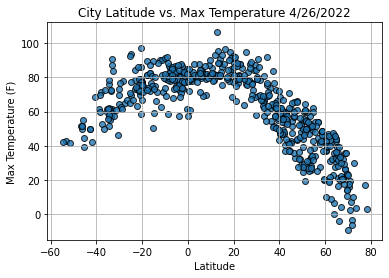

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

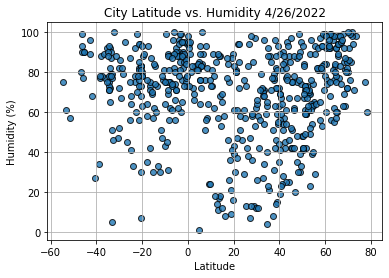

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig2.png")
# Show plot.
plt.show()

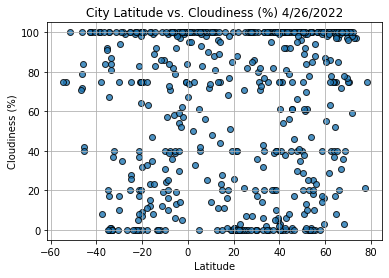

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

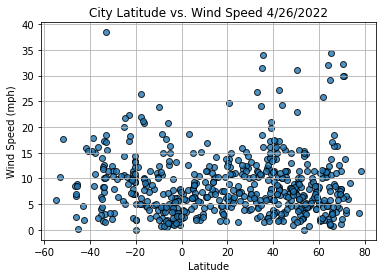

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()